<img src="./assets/weather-bg.jpg" alt="">
<p style="color: #636363; font-size: 0.75rem; font-style: italic; text-align: center;">Photo by Josh Sorenson: 
<a>https://www.pexels.com/photo/body-of-water-1154510/</a></p> 
<h1 style="text-align: center; font-size: 2.5rem; font-weight: bold; margin: 2.5rem 0 1rem;">Classification of Weather Conditions</h1>
<h2 style="text-align: center; font-size: 1rem; font-weight: 500; margin: 0 0 2rem;">Support Vector Machine (SVM) Classification</h2>

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Imports</h2>

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import chi2, SelectKBest
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('./data/weather_classification_data.csv')
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Structural Analysis of the Dataset</h2>"

In [11]:
record_count = df.shape[0]
column_count = df.shape[1]

print(f'Total Number of Records: {record_count}')
print(f'Total Number of Columns: {column_count}')

Total Number of Records: 13200
Total Number of Columns: 11


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Statistical Analysis of the Dataset</h2>

In [14]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [15]:
df.describe(include=object)

,Cloud Cover,Season,Location,Weather Type
count,13200,13200,13200,13200
unique,4,4,3,4
top,overcast,Winter,inland,Rainy
freq,6090,5610,4816,3300


<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Handling Null Values</h2>

The given dataset does not have any null values in any of the data points. Therefore, no further data manipulation is needed to be performed.

In [17]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Checking for Duplicate Records</h2>

The dataset does not have any duplicate records, indicating that each record is **unique** and contributes differently to the overall structure of the data.

In [19]:
df.duplicated().sum()

0

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Normalizing Dataset Columns</h2>

In [21]:
df.rename(columns={
    'Temperature': 'temperature',
    'Humidity': 'humidity',
    'Wind Speed': 'wind_speed',
    'Precipitation (%)': 'precipitation_percentage',
    'Cloud Cover': 'cloud_cover',
    'Atmospheric Pressure': 'atmospheric_pressure',
    'UV Index': 'uv_index',
    'Season': 'season',
    'Visibility (km)': 'visibility_km',
    'Location': 'location',
    'Weather Type': 'weather_type'
}, inplace=True)

<div style="margin: 0.1rem 0;">‎ </div>

<h1 style="text-align: center; font-weight: bold; font-size: 2rem;">Exploratory Data Analysis (EDA)</h1>

<div style="margin: 0.1rem 0;">‎ </div>

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Univariate Analysis</h2>

In [26]:
# Feature Segregation (data = numerical features)
data = [x for x in df.columns if x not in ['cloud_cover', 'season', 'location', 'weather_type']]
data.extend(['',''])

reshaped_data = np.array(data).reshape(3, 3)

<div style="width: 20%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">📊 Boxplots</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

Using boxplots, we can view the general distribution of the data in the dataset, highlighting the data median as well as possible **outliers**. Outliers are defined as data points that differ significantly from the majority of the dataset. In our analysis of different weather conditions for predicting weather types, we can identify the specific outlier records using the interquartile range (IQR) method.

Removing outliers is key to increase the ability of our model to generalize over all type of data. To further discuss, the presence of outliers can lead to the following:
* Retaining outliers can **distort statistical analyses** and lead to **misleading predictions**. Extreme weather conditions might skew our model and lead to erroneous conclusions about typical weather patterns.
* Outliers may introduce **noise** and **complexity** that distract from the central trends we aim to capture. By focusing on the central trends instead, we can enhance the stability and performance of our predictive models."

<div style="margin: 0.1rem 0;">‎ </div>

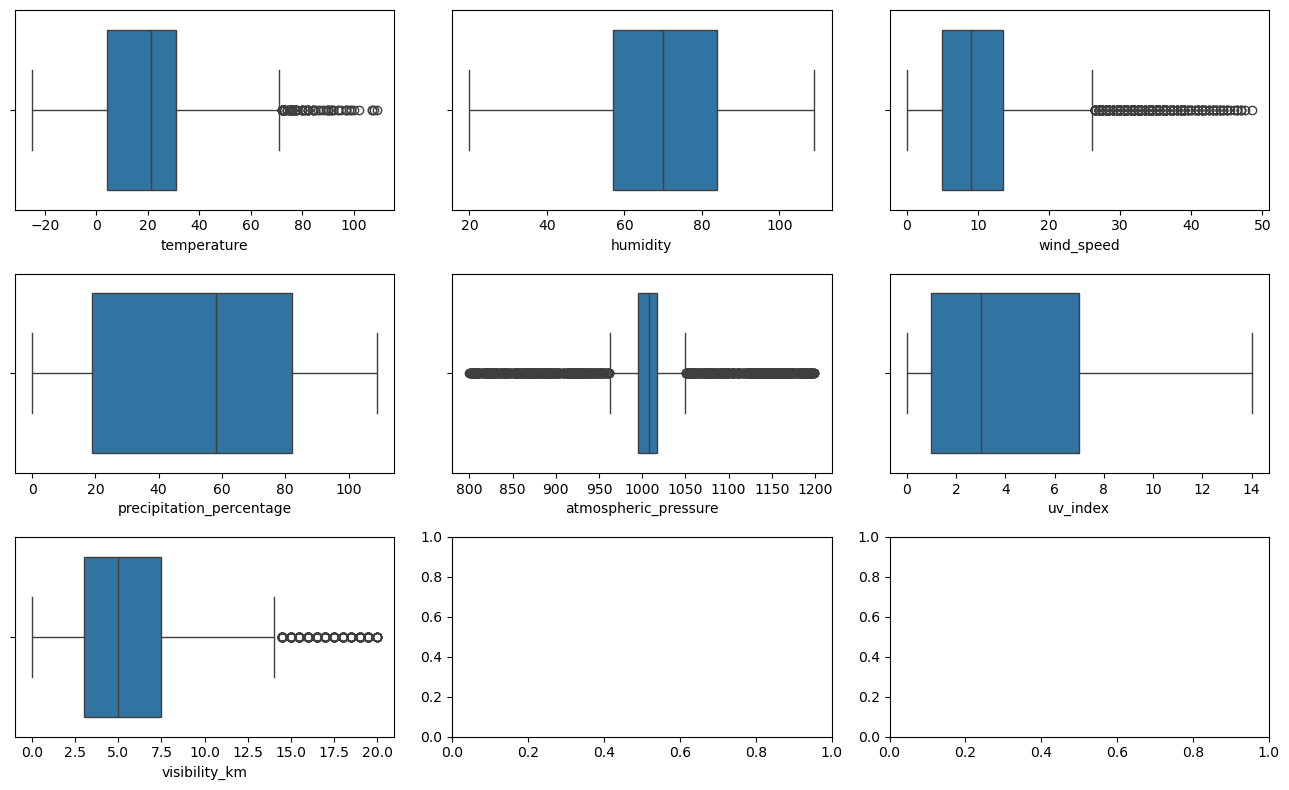

In [30]:
# RAW DATASET: Dataset contains many outliers that can distort the predictive ability of the model

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 8))
for i in range(len(reshaped_data)):
    for j in range(len(reshaped_data[i])):
        if reshaped_data[i][j]:
            sns.boxplot(x=df[reshaped_data[i][j]], ax=axes[i,j])

plt.tight_layout()
plt.show()

In [31]:
print('NUMBER OF OUTLIERS')
for i in data[:-2]:
    feature = df[i]
    
    # Calculate quartiles
    Q1 = np.percentile(feature, 25)
    Q3 = np.percentile(feature, 75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define outlier thresholds
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    
    # Count the existing outliers
    outliers = 0
    for point in feature:
      if point < lower_threshold or point > upper_threshold:
        outliers += 1
    
    print(f"{i}:", outliers)
    
    # Removal of outliers
    df = df[(df[i] >= lower_threshold) & (df[i] <= upper_threshold)]

# Reset index of dataframe after removal
df.reset_index(drop=True, inplace=True)

NUMBER OF OUTLIERS
temperature: 92
humidity: 0
wind_speed: 396
precipitation_percentage: 0
atmospheric_pressure: 927
uv_index: 112
visibility_km: 87


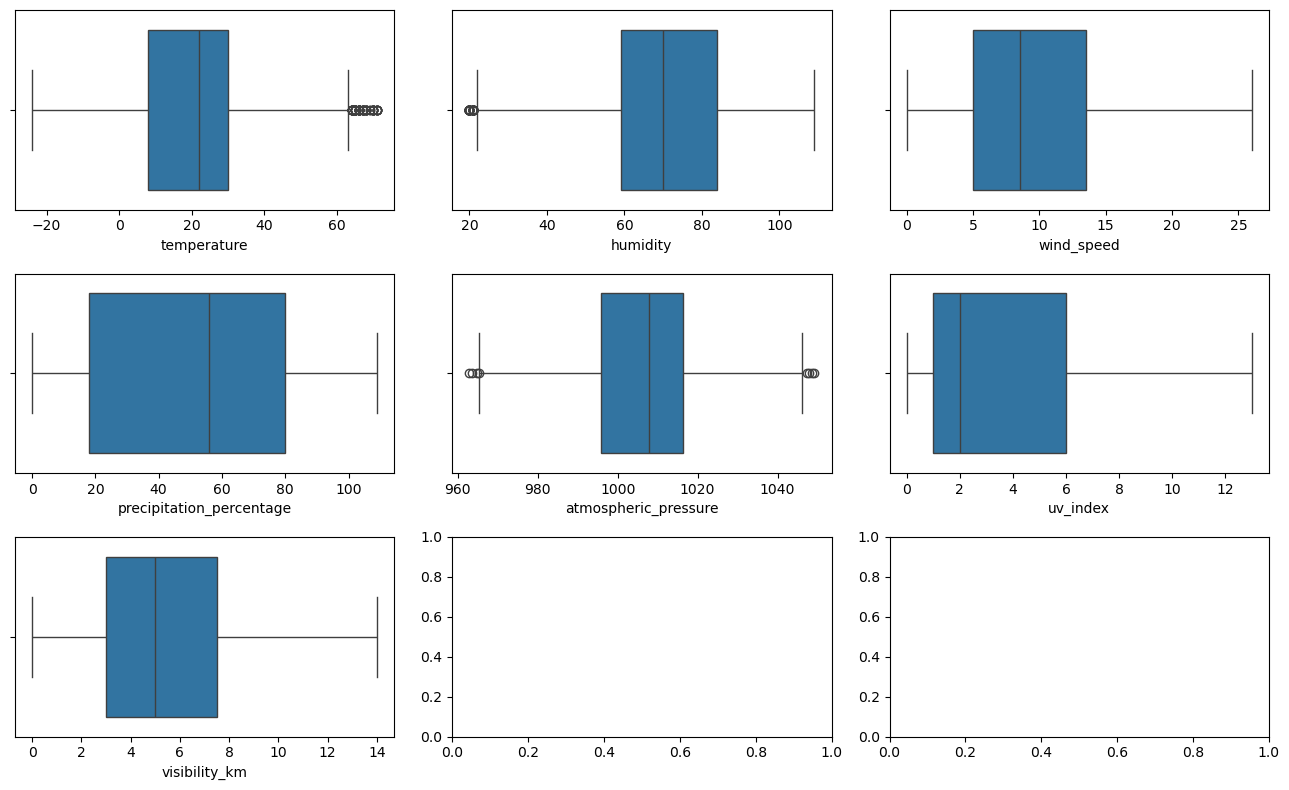

In [32]:
# CLEANED DATASET (Most outliers captured by IQR are removed)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 8))
for i in range(len(reshaped_data)):
    for j in range(len(reshaped_data[i])):
        if reshaped_data[i][j]:
            sns.boxplot(x=df[reshaped_data[i][j]], ax=axes[i,j])

plt.tight_layout()
plt.show()

<div style="width: 20%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">📊 Barplots</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

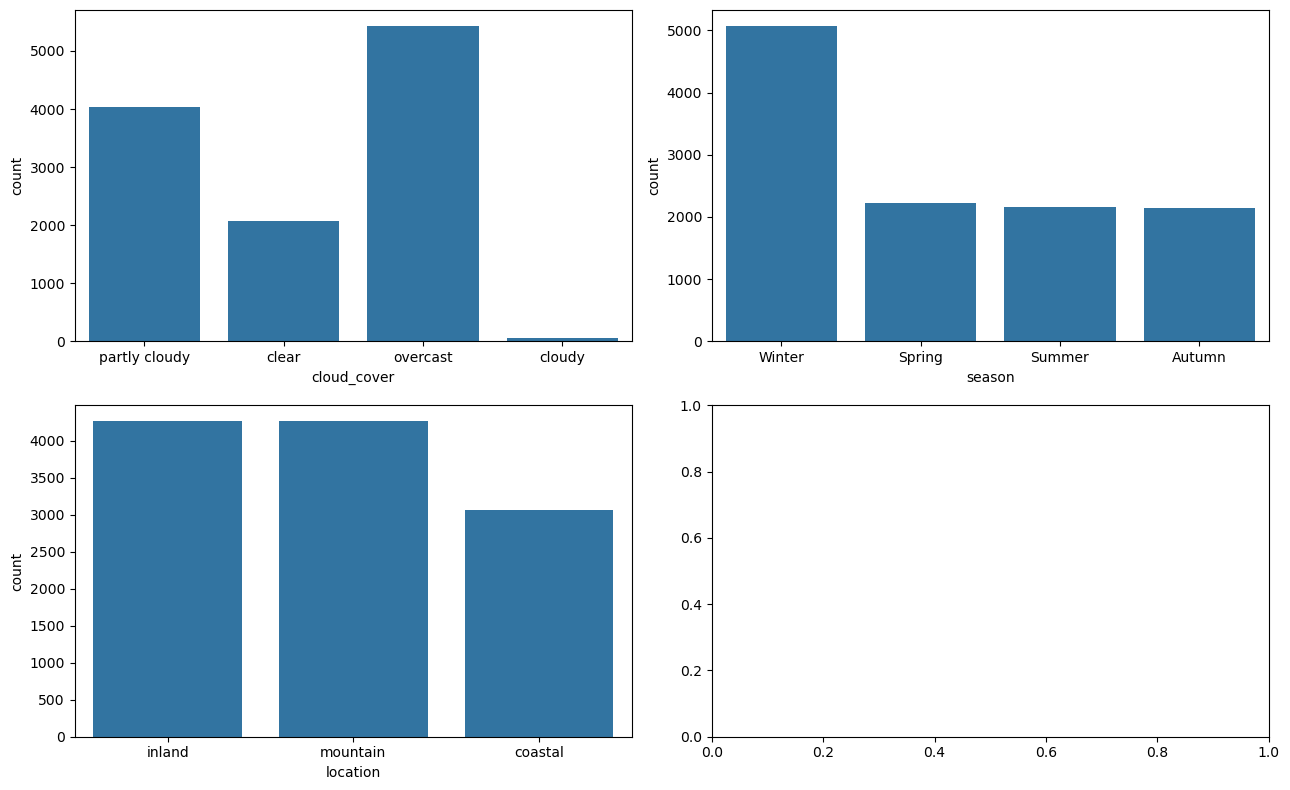

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 8))

sns.countplot(x='cloud_cover', data=df, ax=axes[0,0])
sns.countplot(x='season', data=df, ax=axes[0,1])
sns.countplot(x='location', data=df, ax=axes[1,0])

plt.tight_layout()
plt.show()

<div style="width: 20%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">📊 Histplot</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

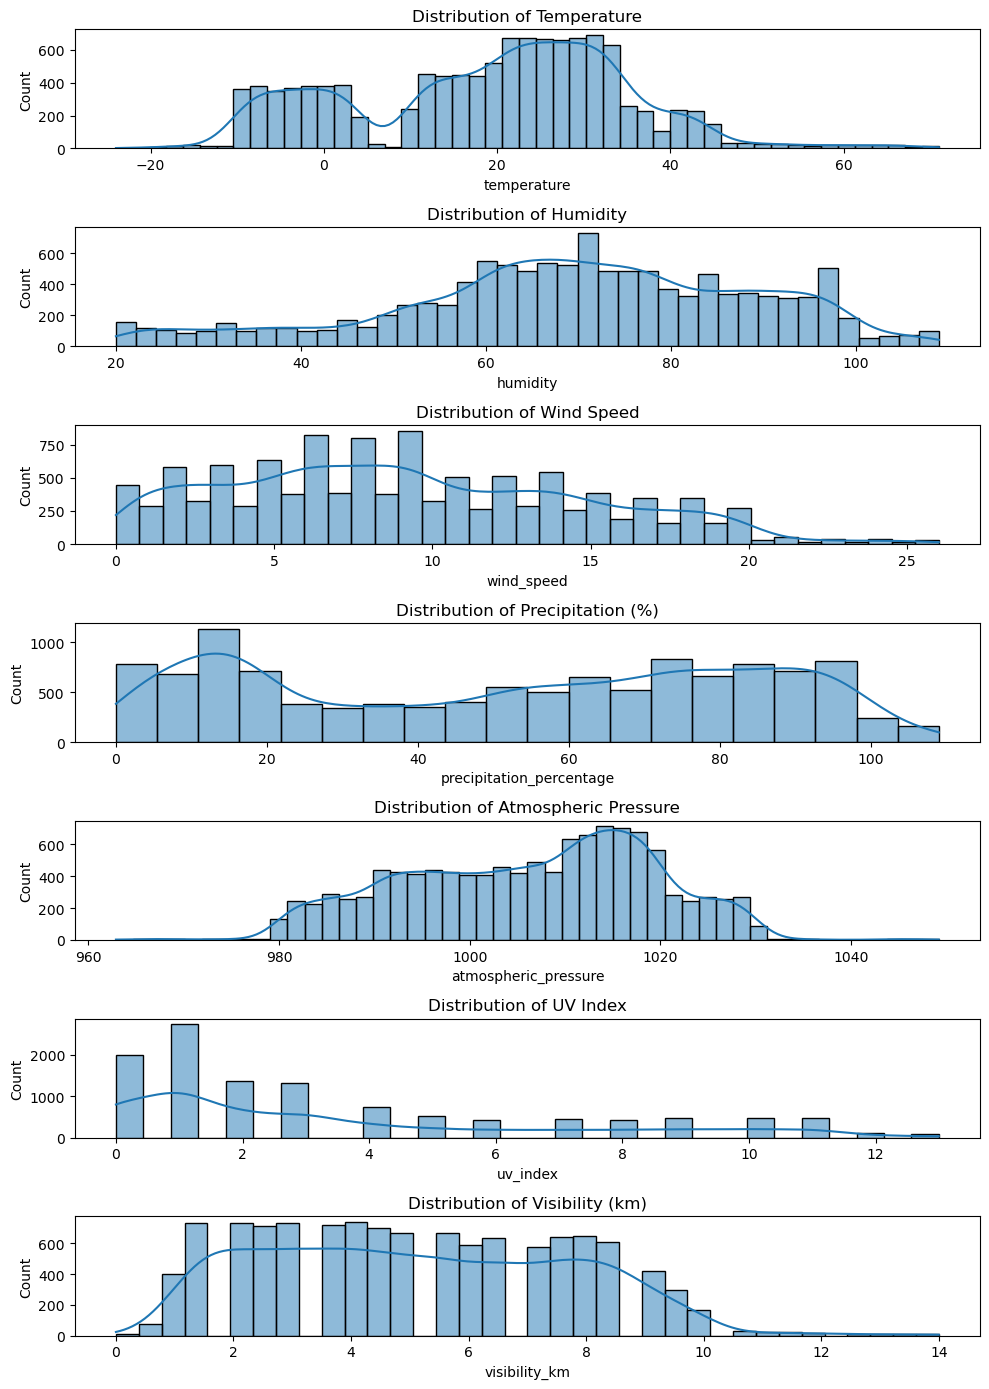

In [36]:
num_features = ['Temperature', 'Humidity', 'Wind Speed','Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
fig, axes = plt.subplots(nrows=len(data)-2, ncols=1, figsize=(10, 14))

for i in range(len(data[:-2])):
        sns.histplot(x=df[data[i]], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {num_features[i]}')
    
plt.tight_layout()
plt.show()

<div style="margin: 0.1rem 0;">‎ </div>

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Bivariate Analysis</h2>

Given the presence of categorical data in our dataset, it is important to analyze their relationship with our target variable, 'weather_type'. This section includes the use of contingency tables alongside the statistical method chi-squared test.

* **Contingency Table**: A contingency table summarizes the frequency distribution of two categorical variables, allowing for a clear visualization of their relationship. It shows how the levels of one variable relate to the levels of another.
  
* **Chi-Squared Test**: This statistical test assesses whether there is a significant association between the two categorical variables in the contingency table. A significant result indicates that the variables are not independent.

<div style="width: 30%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">📊 Contingency Table</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

In [40]:
# Cloud Cover
contingency_table = pd.crosstab(df['cloud_cover'], df['weather_type'])
contingency_table

weather_type,Cloudy,Rainy,Snowy,Sunny
cloud_cover,,,,
clear,0,0,0,2068
cloudy,16,13,16,9
overcast,1200,1942,2282,9
partly cloudy,1744,855,577,855


In [41]:
# Season
contingency_table = pd.crosstab(df['season'], df['weather_type'])
contingency_table

weather_type,Cloudy,Rainy,Snowy,Sunny
season,,,,
Autumn,712,674,10,744
Spring,757,699,12,751
Summer,702,698,13,742
Winter,789,739,2840,704


In [42]:
# Location
contingency_table = pd.crosstab(df['location'], df['weather_type'])
contingency_table

weather_type,Cloudy,Rainy,Snowy,Sunny
location,,,,
coastal,988,1049,17,1008
inland,996,899,1424,945
mountain,976,862,1434,988


<div style="width: 30%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">📊 Chi-Squared Test</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

In [44]:
# Cloud Cover
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Squared: {chi2}, p-value: {p}")

Chi-Squared: 1327.232570624123, p-value: 1.3779140638542475e-283


In [45]:
# Season
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Squared: {chi2}, p-value: {p}")

Chi-Squared: 1327.232570624123, p-value: 1.3779140638542475e-283


In [46]:
# Location
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Squared: {chi2}, p-value: {p}")

Chi-Squared: 1327.232570624123, p-value: 1.3779140638542475e-283


<div style="width: 30%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">📈 Chi-Squared Interpretation</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

* **Chi-Squared Statistic:** A high chi-squared statistic (1327.23) indicates a significant difference between the observed and expected frequencies for all three variables (Cloud Cover, Season, Location).

* The **p-values** (1.38e-283) for all three tests are extremely low, indicating a statistically significant result. Specifically, p-values less than 0.05 typically lead to rejection of the null hypothesis.

In conclusion, there is a statistically significant association between the categorical variables being analyzed. This means that the observed frequencies are significantly different from what would be expected if the two variables were independent. Furthermore, the results suggest a strong association between the variables, indicating that they are likely related in some way.

<div style="margin: 0.1rem 0;">‎ </div>

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Multivariate Analysis</h2>

The heatmap visualization below indicates the cross mapping of variables in terms of the their corresponding degree of linear correlation using the Pearson correlation coefficient.

<div style="width: 30%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">📊 Correlation Heatmap</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

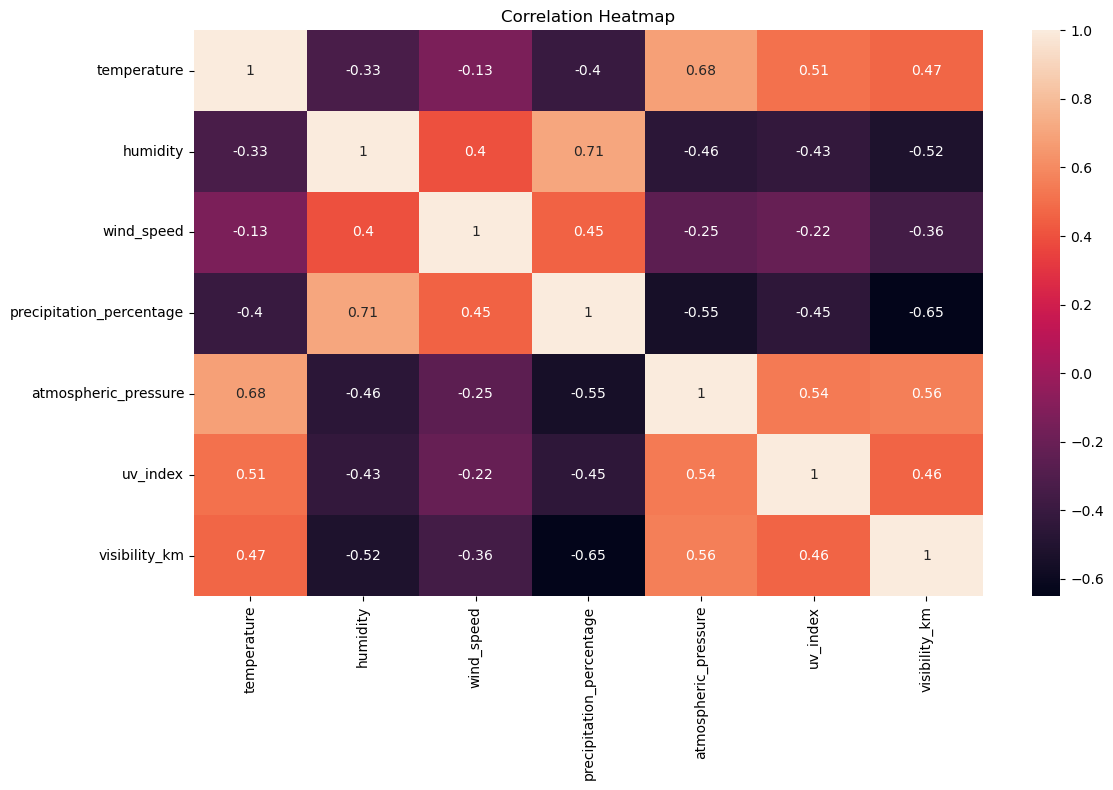

In [52]:
quant_corr = df[data[:-2]]
correlation_matrix = quant_corr.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap")

plt.tight_layout()
plt.show()

<div style="margin: 0.1rem 0;">‎ </div>

<h1 style="text-align: center; font-weight: bold; font-size: 2rem;">Feature Engineering</h1>

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Feature Encoding</h2>

Several features from the dataset are categorical features. In order to incorporate them in the model training, we need to transform then into numerical representations using feature encoding. From the nature of our categorical features, the most appropriate encoding type is **One-Hot Encoding** given that these features only involve **nominal data**.

In [56]:
encoder = OneHotEncoder()

cat_encoded = encoder.fit_transform(df[['cloud_cover', 'season', 'location']]).toarray()
cat_encoded_df = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out())
cat_encoded_df

,cloud_cover_clear,cloud_cover_cloudy,cloud_cover_overcast,cloud_cover_partly cloudy,season_Autumn,season_Spring,season_Summer,season_Winter,location_coastal,location_inland,location_mountain
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
11581,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11582,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
11583,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
11584,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Feature Selection</h2>

In [58]:
# Remove raw categorical and target variables
X = df.drop(columns=['cloud_cover', 'season', 'location', 'weather_type'])

# Include one hot encoded categorical features ('cloud_cover', 'season', 'location')
X = pd.concat([X, cat_encoded_df], axis=1)
y = df['weather_type']

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Feature Scaling</h2>

It is also important to scale the datapoint values of each feature in this case because of their varying value ranges. Please refer to df.describe() listed previously to see the corresponding statistics of the dataset.

In [60]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Splitting the Dataset</h2>

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<div style="margin: 0.1rem 0;">‎ </div>

<div style="margin: 0.1rem 0;">‎ </div>

<h1 style="text-align: center; font-weight: bold; font-size: 2rem;">Building the SVM Models</h1>

<h2 style="padding: 0.75rem 0.5rem; background-color: #513d5c; color: white; text-align: center;">SVM Linear</h2>

In [67]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

<div style="width: 30%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">Prediction Comparison</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

In [69]:
test_df = pd.DataFrame(y_test.values)
pred_df = pd.DataFrame(y_pred)

test_pred_df = pd.concat([test_df, pred_df], axis=1, ignore_index=True)
test_pred_df.columns = ['y_test', 'y_pred']
test_pred_df

,y_test,y_pred
0,Sunny,Sunny
1,Rainy,Rainy
2,Snowy,Snowy
3,Sunny,Sunny
4,Sunny,Cloudy
...,...,...
2313,Cloudy,Cloudy
2314,Rainy,Cloudy
2315,Sunny,Sunny
2316,Cloudy,Cloudy


<div style="width: 30%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">Accuracy Score</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

In [71]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 96.72%


<div style="width: 30%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">Classification Report</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

In [73]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

      Cloudy       0.94      0.95      0.95       597
       Rainy       0.95      0.97      0.96       574
       Snowy       0.99      0.99      0.99       546
       Sunny       0.99      0.96      0.97       601

    accuracy                           0.97      2318
   macro avg       0.97      0.97      0.97      2318
weighted avg       0.97      0.97      0.97      2318



**Precision and Recall**: The model exhibits high precision and recall across all weather categories, indicating it is effective in correctly identifying instances of each weather type while minimizing false positives and false negatives.

**F1-Score**: The F1-scores are all above 0.95, suggesting that the model maintains a good balance between precision and recall, particularly for the Snowy and Sunny categories.

**Support**: The number of instances for each class is relatively balanced, with none of the classes significantly underrepresented, which can contribute to the overall effectiveness of the model.

**Overall Accuracy**: An accuracy of 97% indicates that the model performs exceptionally well in predicting weather types, making it a reliable tool for this classification task.

<div style="width: 30%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">Confusion Matrix</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

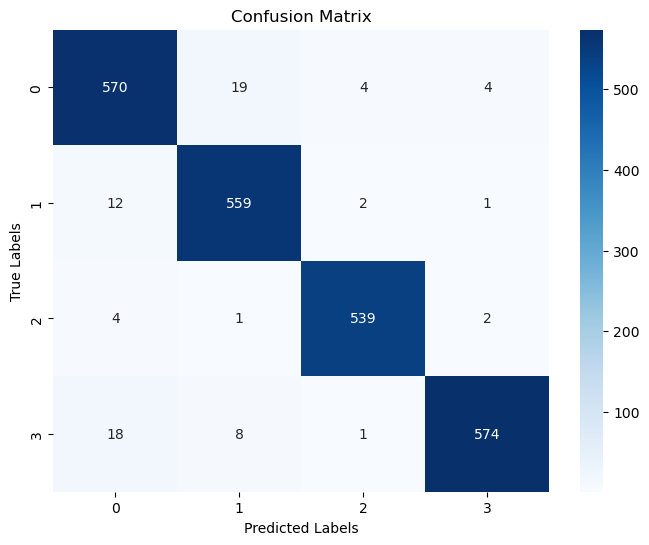

In [76]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

<div style="width: 20%;">
    <h3 style="padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">Cloudy [0]</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

**True Negative (TN)**: The model correctly predicted 1687 instances of weather conditions as NOT cloudy.
<br>
**False Positive (FP)**: The model incorrectly predicted 34 instances of weather conditions as cloudy but were actually not cloudy.
<br>
**False Negative (FN)**: The model incorrectly predicted 27 instances of weather conditions as not cloudy but were actually cloudy.
<br>
**True Positive (TP)**: The model correctly predicted 570 instances of weather conditions as cloudy.

<div style="width: 20%;">
    <h3 style="padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">Rainy [1]</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

**True Negative (TN)**: The model correctly predicted 1716 instances of weather conditions as NOT rainy.
<br>
**False Positive (FP)**: The model incorrectly predicted 28 instances of weather conditions as rainy but were actually not rainy.
<br>
**False Negative (FN)**: The model incorrectly predicted 15 instances of weather conditions as not rainy but were actually rainy.
<br>
**True Positive (TP)**: The model correctly predicted 559 instances of weather conditions as rainy.

<div style="width: 20%;">
    <h3 style="padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">Snowy [2]</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

**True Negative (TN)**: The model correctly predicted 1765 instances of weather conditions as NOT snowy.
<br>
**False Positive (FP)**: The model incorrectly predicted 7 instances of weather conditions as snowy but were actually not snowy.
<br>
**False Negative (FN)**: The model incorrectly predicted 7 instances of weather conditions as not snowy but were actually snowy.
<br>
**True Positive (TP)**: The model correctly predicted 539 instances of weather conditions as snowy.

<div style="width: 20%;">
    <h3 style="padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">Sunny [3]</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

**True Negative (TN)**: The model correctly predicted 1710 instances of weather conditions as NOT sunny.
<br>
**False Positive (FP)**: The model incorrectly predicted 7 instances of weather conditions as sunny but were actually not sunny.
<br>
**False Negative (FN)**: The model incorrectly predicted 27 instances of weather conditions as not sunny but were actually sunny.
<br>
**True Positive (TP)**: The model correctly predicted 574 instances of weather conditions as sunny.

<div style="margin: 0.1rem 0;">‎ </div>

<h2 style="padding: 0.75rem 0.5rem; background-color: #513d5c; color: white; text-align: center;">SVM RBF</h2>

In [87]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred = svm_rbf.predict(X_test)

<div style="width: 30%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">Prediction Comparison</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

In [89]:
test_df = pd.DataFrame(y_test.values)
pred_df = pd.DataFrame(y_pred)

test_pred_df = pd.concat([test_df, pred_df], axis=1, ignore_index=True)
test_pred_df.columns = ['y_test', 'y_pred']
test_pred_df

,y_test,y_pred
0,Sunny,Sunny
1,Rainy,Rainy
2,Snowy,Snowy
3,Sunny,Sunny
4,Sunny,Cloudy
...,...,...
2313,Cloudy,Cloudy
2314,Rainy,Cloudy
2315,Sunny,Sunny
2316,Cloudy,Cloudy


<div style="width: 30%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">Accuracy Score</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

In [91]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 97.07%


<div style="width: 30%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">Classification Report</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

In [93]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

      Cloudy       0.94      0.96      0.95       597
       Rainy       0.95      0.98      0.97       574
       Snowy       1.00      0.98      0.99       546
       Sunny       0.99      0.96      0.98       601

    accuracy                           0.97      2318
   macro avg       0.97      0.97      0.97      2318
weighted avg       0.97      0.97      0.97      2318



**High Precision and Recall**: The model shows high precision and recall across all weather categories, indicating it accurately identifies instances of each weather type while minimizing false positives and false negatives.

**F1-Score**: F1-scores are all above 0.95, indicating a strong balance between precision and recall. The Snowy category has a perfect precision score, suggesting that every prediction made for this class was correct.

**Support**: The support values for each class are relatively balanced, meaning that no single class is underrepresented in the dataset, contributing to the robustness of the classification results.

**Overall Accuracy**: An accuracy of 97% indicates that the model performs very well in predicting weather types, confirming its reliability for this classification task.

<div style="width: 30%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">Confusion Matrix</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

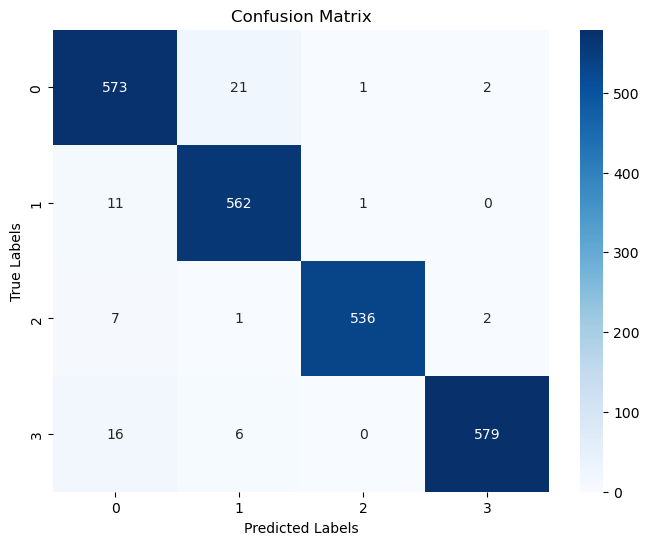

In [96]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

<div style="width: 20%;">
    <h3 style="padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">Cloudy [0]</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

**True Negative (TN)**: The model correctly predicted 1687 instances of weather conditions as NOT cloudy.
<br>
**False Positive (FP)**: The model incorrectly predicted 34 instances of weather conditions as cloudy but were actually not cloudy.
<br>
**False Negative (FN)**: The model incorrectly predicted 24 instances of weather conditions as not cloudy but were actually cloudy.
<br>
**True Positive (TP)**: The model correctly predicted 573 instances of weather conditions as cloudy.

<div style="width: 20%;">
    <h3 style="padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">Rainy [1]</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

**True Negative (TN)**: The model correctly predicted 1716 instances of weather conditions as NOT rainy.
<br>
**False Positive (FP)**: The model incorrectly predicted 28 instances of weather conditions as rainy but were actually not rainy.
<br>
**False Negative (FN)**: The model incorrectly predicted 12 instances of weather conditions as not rainy but were actually rainy.
<br>
**True Positive (TP)**: The model correctly predicted 562 instances of weather conditions as rainy.

<div style="width: 20%;">
    <h3 style="padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">Snowy [2]</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

**True Negative (TN)**: The model correctly predicted 1770 instances of weather conditions as NOT snowy.
<br>
**False Positive (FP)**: The model incorrectly predicted 2 instances of weather conditions as snowy but were actually not snowy.
<br>
**False Negative (FN)**: The model incorrectly predicted 10 instances of weather conditions as not snowy but were actually snowy.
<br>
**True Positive (TP)**: The model correctly predicted 536 instances of weather conditions as snowy.

<div style="width: 20%;">
    <h3 style="padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">Sunny [3]</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

**True Negative (TN)**: The model correctly predicted 1713 instances of weather conditions as NOT sunny.
<br>
**False Positive (FP)**: The model incorrectly predicted 4 instances of weather conditions as sunny but were actually not sunny.
<br>
**False Negative (FN)**: The model incorrectly predicted 22 instances of weather conditions as not sunny but were actually sunny.
<br>
**True Positive (TP)**: The model correctly predicted 579 instances of weather conditions as sunny.

<div style="margin: 0.1rem 0;">‎ </div>

<h1 style="text-align: center; font-weight: bold; font-size: 2rem;">Model Evaluation</h1>

<div style="margin: 0.1rem 0;">‎ </div>

<div style="padding: 0.75rem 1rem; background-color: #513d5c; color: white; font-size: 1rem;">
Overall, the <span style='font-weight: bold;'>Non-linear SVM model (rbf-based)</span> performed slightly better than the Linear SVM model mainly in terms of pure accuracy score. This could mean that weather condition related features that we have has a <span style='font-weight: bold;'>non-linear relationship</span> with the target variable 'weather_type'. Further analysis of different metrics are discussed below.
</div>

<div style="width: 30%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">Accuracy Score</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

In terms of accuracy score, the RBF SVM model performed marginally better than the Linear SVM model.

* SVM - Linear: 96.72%
* SVM - RBF: 97.07%

<div style="width: 30%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">Modeling Implications</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

The model results suggest that it might be better to fit the data through a **non-linear** model. This might be a result of certain features exhibiting a non-linear relationship to the target variable where the predicted weather type immediately shifts to another as the value of the independent variable reaches a certain value (exhibiting logarithmic change) such as:

* Humidity
* Atmospheric Pressure

<div style="width: 30%;">
    <h3 style="background-color: #a07fb3; color: white; padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">Sensitivity & Specificity</h3>
    <div style="margin: 1.5rem 0;"></div>
</div>

Given the results of confusion matrix for each model, we can understand the behavior of the models in predicting the **true positive** and **true negative rates**.

<div style="width: 20%;">
    <h3 style="padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">Cloudy</h3>
</div>

<h3 style='font-size: 1.25rem;'>SVM - Linear</h3>

<ul>
    <li>Sensitivity: 0.96</li>
    <li>Specificity: 0.98</li>
</ul>

<h3 style='font-size: 1.25rem;'>SVM - RBF</h3>

<ul>
    <li>Sensitivity: 0.96</li>
    <li>Specificity: 0.98</li>
</ul>
<br>

**Interpretation**: Both models perform equally well for predicting cloudy conditions, achieving the same sensitivity and specificity values.

<div style="width: 20%;">
    <h3 style="padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">Rainy</h3>
</div>

<h3 style='font-size: 1.25rem;'>SVM - Linear</h3>

<ul>
    <li>Sensitivity: 0.98</li>
    <li>Specificity: 0.98</li>
</ul>

<h3 style='font-size: 1.25rem;'>SVM - RBF</h3>

<ul>
    <li>Sensitivity: 0.98</li>
    <li>Specificity: 0.98</li>
</ul>
<br>

**Interpretation**: Both models again perform equally well for predicting rainy conditions, with identical metrics.

<div style="width: 20%;">
    <h3 style="padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">Snowy</h3>
</div>

<h3 style='font-size: 1.25rem;'>SVM - Linear</h3>

<ul>
    <li>Sensitivity: 0.98</li>
    <li>Specificity: 0.999</li>
</ul>

<h3 style='font-size: 1.25rem;'>SVM - RBF</h3>

<ul>
    <li>Sensitivity: 0.98</li>
    <li>Specificity: 0.999</li>
</ul>
<br>

**Interpretation**: For snowy conditions, both models also exhibit the same performance. However, both models show high sensitivity and specificity, which is excellent for accurately predicting snowy weather.

<div style="width: 20%;">
    <h3 style="padding: 0.5rem 0.5rem; text-align: center; vertical-align: middle; box-shadow: 5px 5px #4d3e66;">Sunny</h3>
</div>

<h3 style='font-size: 1.25rem;'>SVM - Linear</h3>

<ul>
    <li>Sensitivity: 0.96</li>
    <li>Specificity: 0.998</li>
</ul>

<h3 style='font-size: 1.25rem;'>SVM - RBF</h3>

<ul>
    <li>Sensitivity: 0.96</li>
    <li>Specificity: 0.997</li>
</ul>
<br>

**Interpretation**: Both models perform similarly for sunny conditions. While the SVM - Linear model has a slightly higher specificity than the SVM - RBF model, the difference is minimal, indicating both models are effective in predicting sunny weather.

